In [1]:
from pathlib import Path
import pandas as pd

Download https://drive.google.com/drive/folders/1BZFez3OFs7QMzeDUz-8E0SgnRy227pnG

Unzip

In [2]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13Qm6ztAmVyBHvo_mch6gk-2VYKUHeRuu" -O inno_stats.tar.gz && rm -rf /tmp/cookies.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!mkdir data && tar -xf inno_stats.tar.gz -C ./data

A subdirectory or file data already exists.


In [4]:
data_path = Path('./data/').resolve()
!ls {data_path}

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
g_9 = pd.read_csv('./data/09_groups.csv')
g_9.head()


,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_group
0,2020-09-01 17:01:25,1283228,0.0,1538855,52,271,1.0,108.00,0,10004
1,2020-09-01 17:35:36,8873113,0.0,267307,52,271,1.0,108.00,0,10004
2,2020-09-01 19:19:21,12712899,0.0,610220,52,271,1.0,107.95,0,10004
3,2020-09-01 21:53:34,21535283,0.0,441497,52,271,1.0,108.00,0,10004
4,2020-09-01 18:42:31,642341,0.0,1065358,61,97,2.0,88.00,0,10091


In [6]:
p_g = pd.read_csv('./data/product_groups.csv', delimiter=';', encoding='windows-1251')
p_g.head()


,id_tov,id_group,name_group
0,52,10004,Кисломолочные продукты
1,75,10004,Кисломолочные продукты
2,77,10004,Кисломолочные продукты
3,143,10004,Кисломолочные продукты
4,151,10004,Кисломолочные продукты


In [7]:
df = g_9

In [8]:
bad_idx = pd.read_csv('./data/bad_ids.csv')
bad_idx.head()

,Unnamed: 0,id_card
0,0,806096
1,1,1438102
2,2,72344
3,3,427981
4,4,1528414


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100858 entries, 0 to 42100857
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   id_doc    int64  
 2   id_order  float64
 3   id_card   int64  
 4   id_tov    int64  
 5   id_kontr  int64  
 6   quantity  float64
 7   sum       float64
 8   is_green  int64  
 9   id_group  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ GB


In [10]:
df_clean =df[~df.id_card.isin(bad_idx.id_card.values)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38466003 entries, 0 to 42100857
Data columns (total 10 columns):
 #   Column    Dtype  
---  ------    -----  
 0   date      object 
 1   id_doc    int64  
 2   id_order  float64
 3   id_card   int64  
 4   id_tov    int64  
 5   id_kontr  int64  
 6   quantity  float64
 7   sum       float64
 8   is_green  int64  
 9   id_group  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.2+ GB


## Task 1

Prove that buying discounted products depends on the average order sum. (It is more probable that the discounted product will be bought if bunch of money is going to be spend)

In [19]:
avg_expenditure = df_clean.groupby("id_doc")['sum'].mean()
no_discount = df_clean.groupby("id_doc")['is_green'].any()
discount = ~no_discount

Lets set up our

**H0** hypothesis, that buying discounted goods DOES NOT depend on avg receipt sum

then the

**HA** will be that buying discounted goods DOES depend on avg receipt sum

In [20]:
from scipy.stats import ttest_ind

avg_no_discount = avg_expenditure[no_discount]
avg_discount = avg_expenditure[discount]

ttest_ind(avg_discount, avg_no_discount)[1]

0.0

We got low p-value, hence **H0** is rejected in favor of **HA**

## Task 2
Prove that the frequency of shopping grows around the wage taking days ((1-6 days of each month, 20 -26 days of each month).

In [28]:
date = pd.to_datetime(df_clean['date'],format='%Y-%m-%d %H:%M:%S')
purchases_per_day = date.groupby(date.dt.day).count()

date
1     1386381
2     1403567
3     1406574
4     1394242
5     1167874
6     1279774
7     1490998
8     1343796
9     1455905
10    1424965
11    1406188
12    1200989
13    1289206
14    1490892
15    1436508
16    1446709
17    1295384
18    1559868
19    1288153
20    1330407
21    1492300
22    1474016
23    1467160
24    1458965
25    1493372
26    1247927
27    1346850
28    1541365
29    1538009
30    1542514
Name: date, dtype: int64

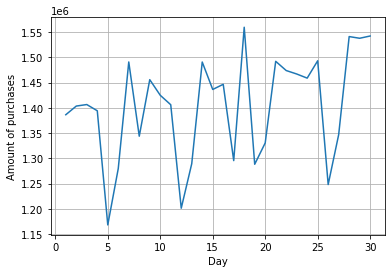

In [34]:
import matplotlib.pyplot as plt

plt.plot(purchases_per_day)
plt.grid(True)
plt.xlabel('Day')
plt.ylabel('Amount of purchases')

plt.show()

## Task 3
Define such cohort existence:
1. Frequent buyers - The users that are shopping frequently(daily, weekly, monthly) 
2. Average purchase sum - The customers that usually spend the same amount of money 
3. Orders amount - The customers grouped by the total numer of orders 
4. Usual cart - The customers grouped by the product groups

References
- https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

Frequent buyers


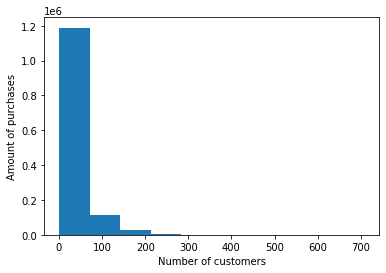

In [50]:
user_purchase = df_clean.groupby('id_card')['id_doc'].count()

plt.hist(user_purchase, bins=10)
plt.xlabel('Number of customers')
plt.ylabel('Amount of purchases')
plt.show()

Orders amount

Text(0, 0.5, 'Amount of purchases')

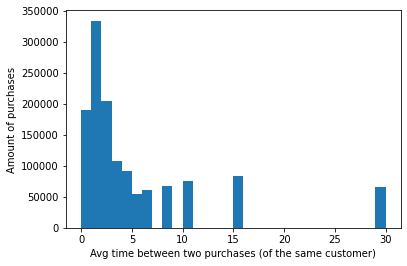

In [51]:
frequent_purchases = (30. / user_purchase).round()

plt.hist(frequent_purchases, bins=30)
plt.xlabel('Avg time between two purchases (of the same customer)')
plt.ylabel('Amount of purchases')

Avg purchase sum

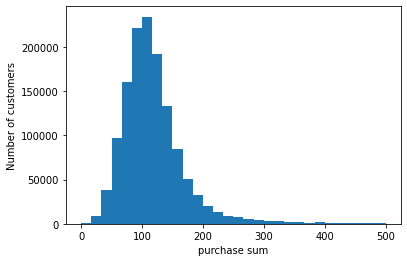

In [49]:
avg_sum = df_clean.groupby('id_card')['sum'].mean()
plt.hist(avg_sum[avg_sum < 500], bins=30)
plt.ylabel('Number of customers')
plt.xlabel('purchase sum')
plt.show()


Usual cart

* Top 10 most purchased product groups

Text(0.5, 0, 'Group Id')

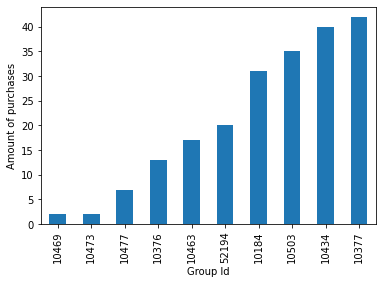

In [58]:
most_buyed_groups = df.groupby('id_group')['id_card']
most_buyed_groups.unique().apply(len).sort_values(ascending=True)[:10].plot(kind='bar')
plt.ylabel('Amount of purchases')
plt.xlabel('Group Id')